# Grupo

| RA | Nome |
| :---------------- | :------: |
| 200109 | Leonardo Dimarchi Souza da Cruz |
| 200359 | Luiz Fernando Toquetto |
| 224072 | Vinícius Martins Granso |

# Dataset

O dataset escolhido foi o [Red Wine Quality](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009). Ele possui informações de variáveis físico-químicas (são as entradas) e dados sensoriais (sáida).

In [4]:
import pandas as pd

# Lendo o dataset
dataset_original = pd.read_csv('winequality-red.csv')

# Análise Exploratória de Dados (EDA)

### Análise dos atributos

In [5]:
# Exibindo as 5 primeiras linhas do dataset
display(dataset_original.head())

# Exibindo algumas estatísticas dos atributos
dataset_original.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Comm a visualização do dataset, podemos entender o que cada uma significa, com a ajuda do fórum de discussões do Kaggle para as colunas menos intuitivas:

Variáveis ​​de entrada (com base em testes físico-químicos):

- **fixed acidity**: float
- **volatile acidity**: float
- **citric acid**: float
- **residual sugar**: float
- **chlorides**: float
- **free sulfur dioxide**: float
- **total sulfur dioxide**: float
- **density**: float
- **pH**: float
- **sulphates**: float
- **alcohol**: float

Variável de saída (com base em dados sensoriais)

- **quality**: integer

### Verificação de valores ausentes 

In [6]:
soma_de_nulos_por_atributo = dataset_original.isnull().sum();
print(soma_de_nulos_por_atributo)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Não existem valores nulos em nenhum dos atributos deste dataset.


# Pré-processamento

### Correlação

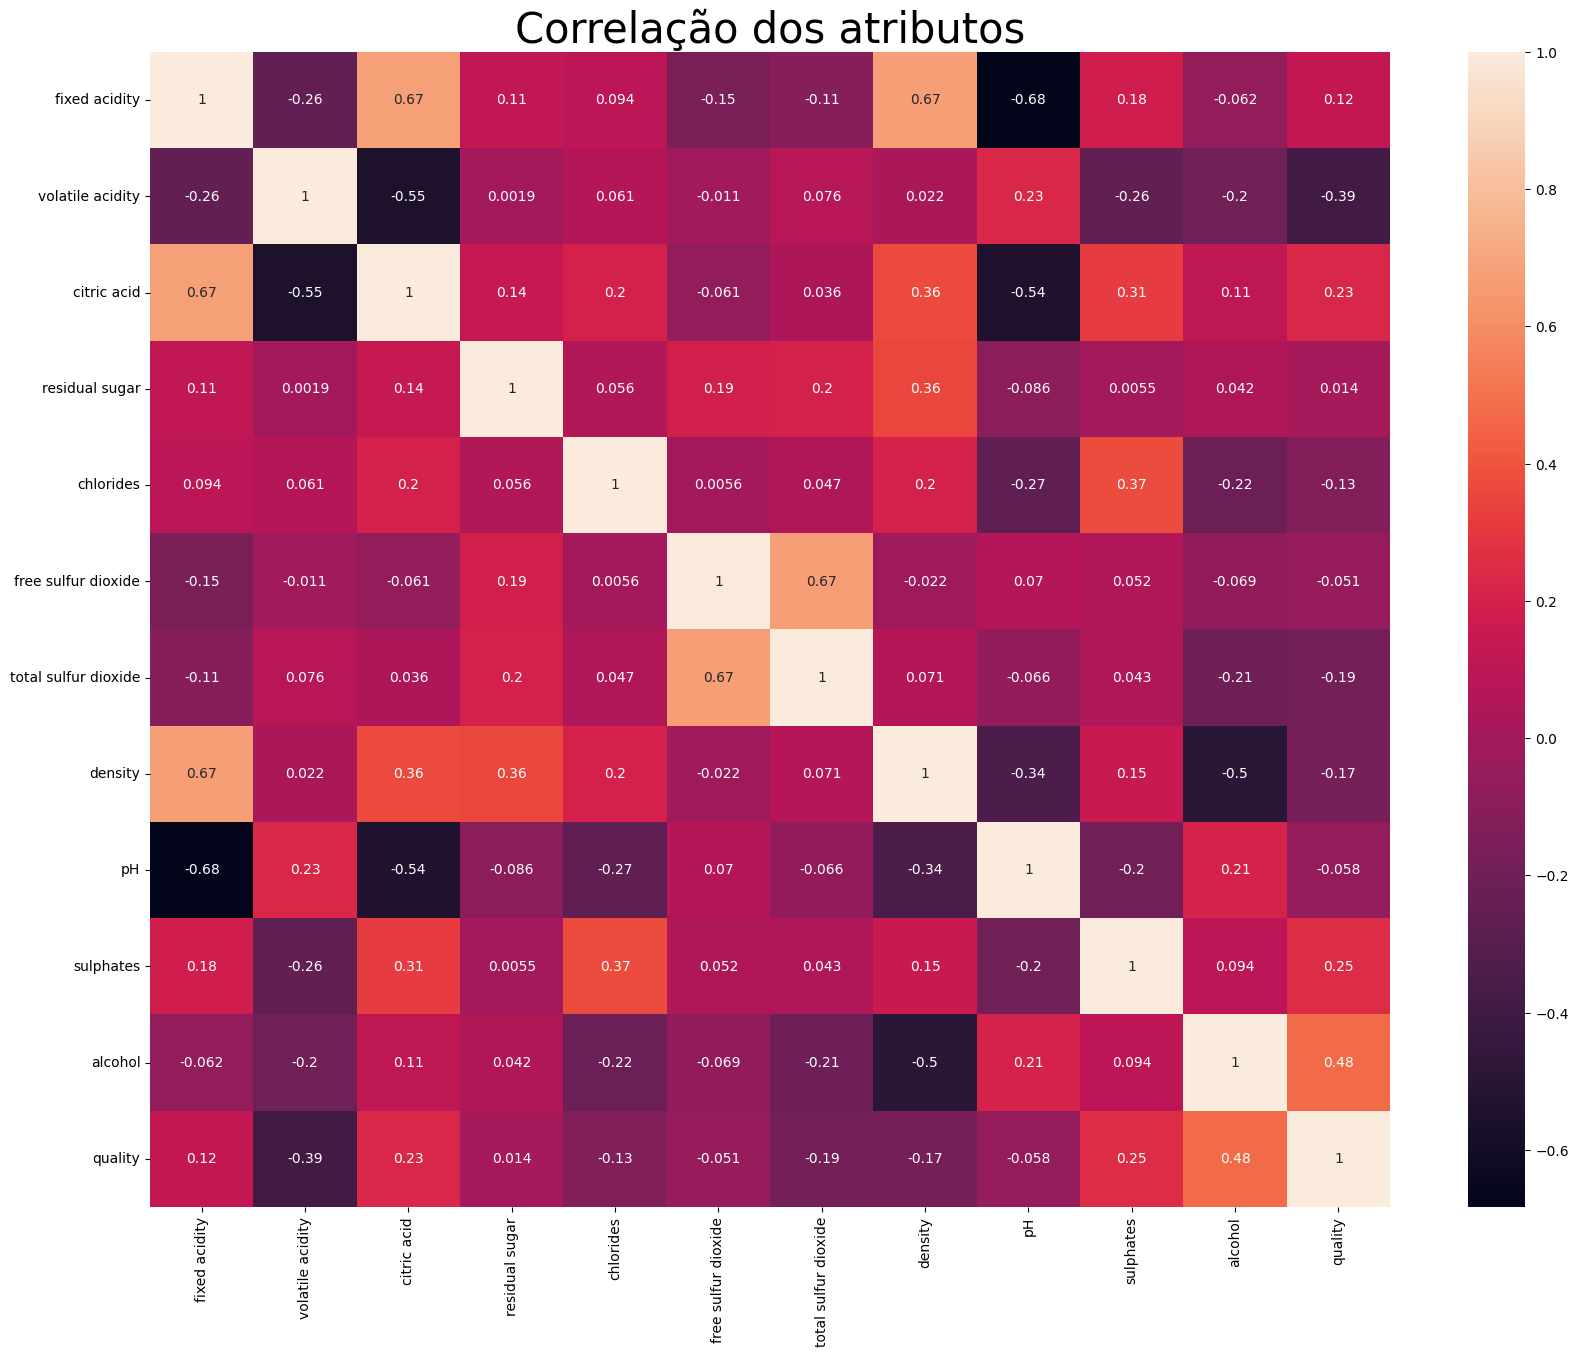

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Realizando a cópia do dataset para manter a cópia original 
dataset = dataset_original.copy()

# Calculando o mapa de correlação
mapa_de_correlacao = dataset.corr()

# Plotando o mapa de correlação
plt.figure(figsize=(20,15))
sns.heatmap(mapa_de_correlacao, annot=True)
plt.title("Correlação dos atributos",fontsize=30)
plt.show()


Plotamos o heatmap da correlação dos atributos para identificar quais são mais relevantes para determinar a quailidade do vinho. 
Removeremos alguns desses atributos na próxima etapa.

- As colunas alcohol, volatile acidity e sulphates são as colunas que se correlacionam melhor com a qualidade do vinho.

### Remoção de atributos

In [8]:
# Removendo os atributos 
colunas_para_remover = ['residual sugar', 'free sulfur dioxide', 'pH']
dataset_pos_remocao_colunas = dataset.drop(colunas_para_remover, axis=1)

# Exibindo as dimensões do dataset
print(dataset_pos_remocao_colunas.shape)

(1599, 9)


Dado o resultado do heatmap, removeremos os seguintes atributos:

- residual sugar
- free sulfur dioxide 
- pH 



### Outliers

Verificar o que podemos fazer


<Axes: >

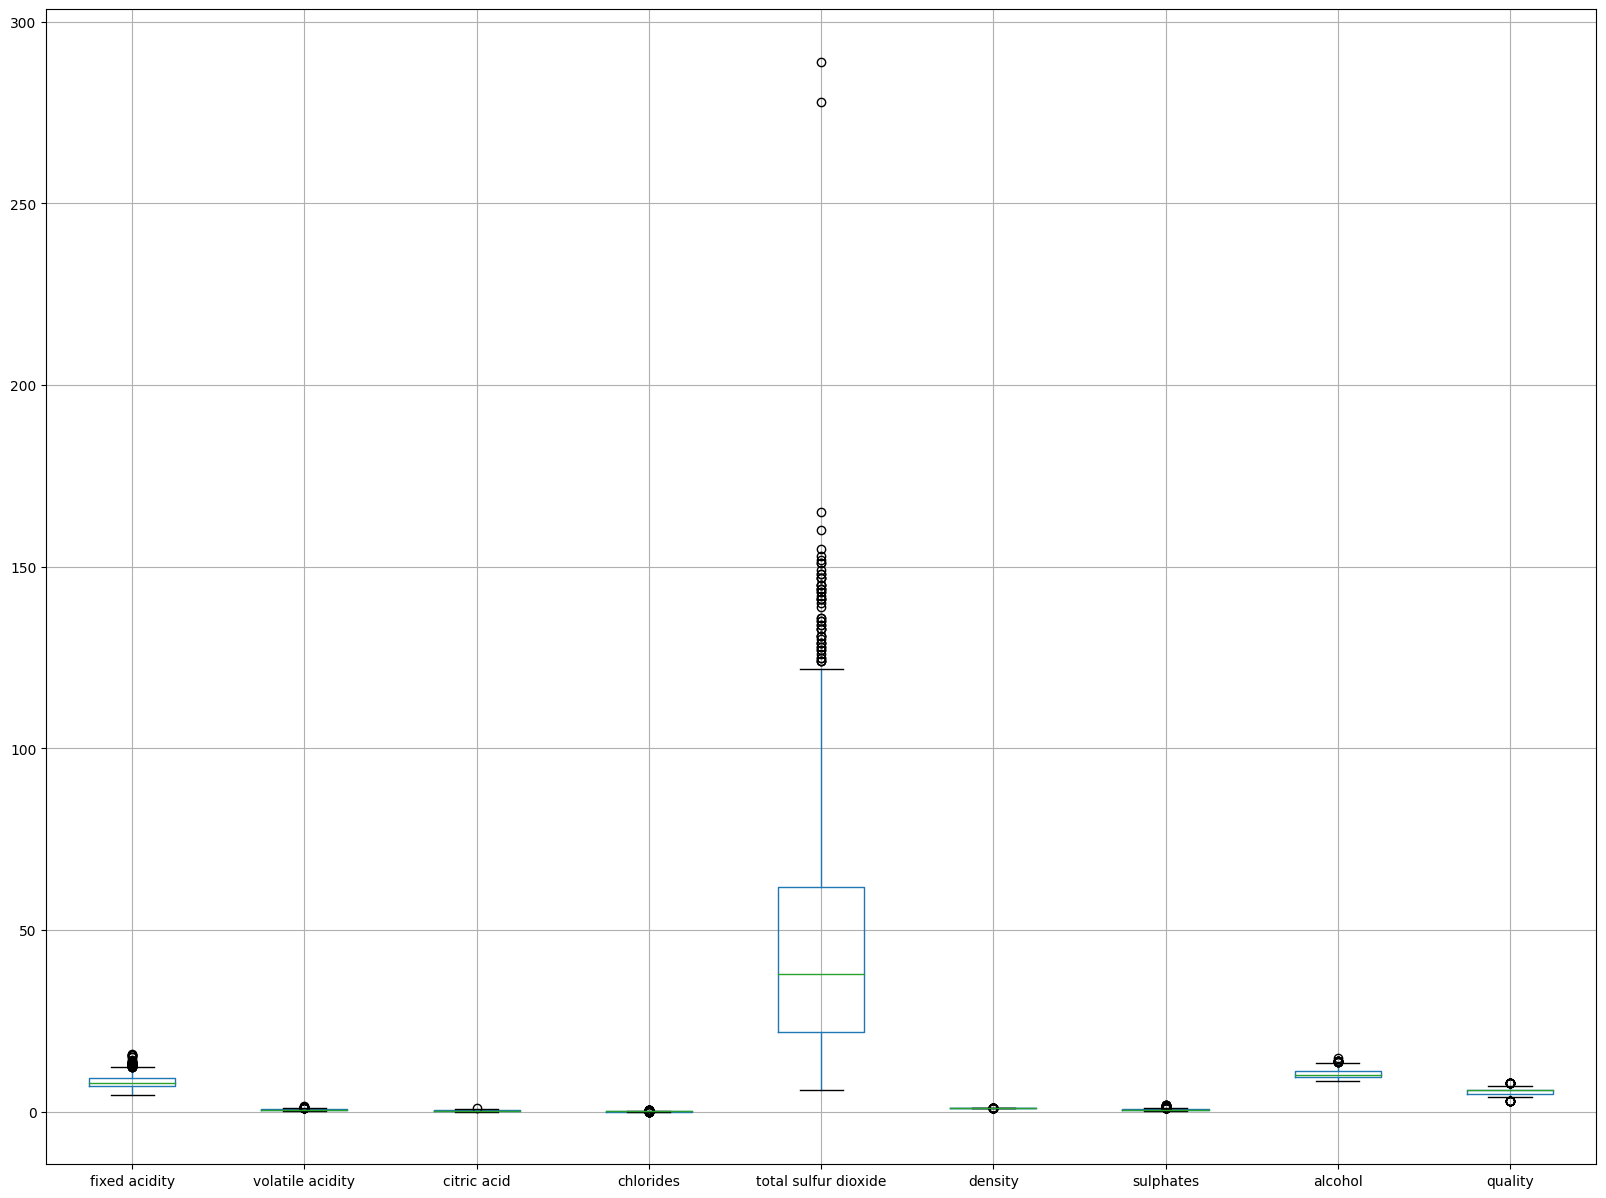

In [9]:
dataset_pos_remocao_colunas.boxplot(figsize=(20,15))

### Tratamento de desequilíbrio de classes

Verificar o que podemos fazer

### Separação dos dados de treino/teste

In [12]:
from sklearn.model_selection import train_test_split

# Separando o target e os outros atributos
X = dataset_pos_remocao_colunas.drop(['quality'], axis=1)
y = dataset_pos_remocao_colunas['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelos 

### Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Acurácia: {accuracy:.2f}')
# print(classification_report(y_test, y_pred))

Acurácia: 0.56


### KNN

In [14]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# cria um vetor que vai auxiliar a identificar quais registros são considerados
# no treino e quais não são, como se fosse um filtro
indices = []
for _ in range(len(X_train)):
  indices.append(True)

# faz a logica de tentar eliminar cada registro e ver se está correto
for i in range(len(X_train)):
  indices[i] = False
  model = KNeighborsClassifier(n_neighbors = 1)
  model.fit(X_train[indices], y_train[indices])

  pred = model.predict([X_train.values[i]])
  if pred != y_train.values[i]:
    indices[i] = True

print("Quantas amostras de treino sobraram:", len(X_train[indices]))

# calcula o resultado final depois da redução

model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train[indices], y_train[indices])
pred = model.predict(X_test)

print("Acurácia:", (pred == y_test).sum() / len(X_test) * 100)

Quantas amostras de treino sobraram: 626
Acurácia: 55.208333333333336


### Redes neurais

2023-11-02 10:53:19.821311: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-02 10:53:19.847461: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-02 10:53:19.847913: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-02 10:53:20.592616: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-11-02 10:53:21.341260: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-02 10:53:21.341524: W tensorflow/core/common_r

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4


,3,4,5,6,7,8
0,False,False,True,False,False,False
1,False,False,True,False,False,False
2,False,False,True,False,False,False
3,False,False,False,True,False,False
4,False,False,True,False,False,False


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 8)                 17        
 on)                                                             
                                                                 
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 6)                 30        
                                                                 
Total params: 155 (624.00 Byte)
Trainable params: 138 (552.00 Byte)
Non-trainable params: 17 (72.00 Byte)
_________________________________________________________________
15/15 [==============================] - 0s 896us/step
['loss', 'accuracy']
[0.950

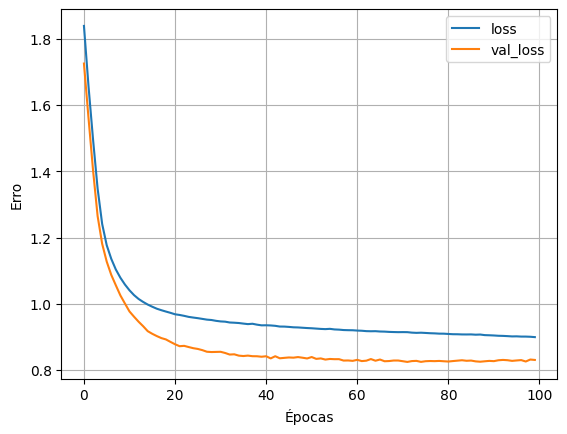

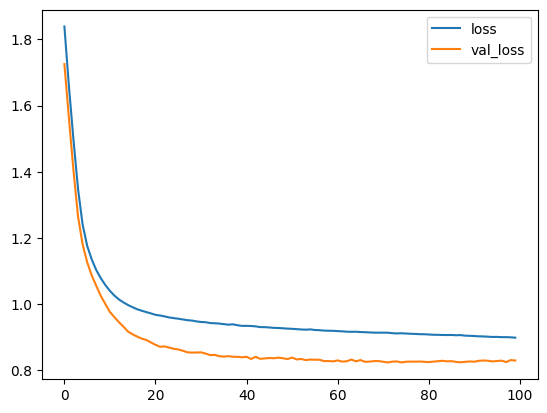

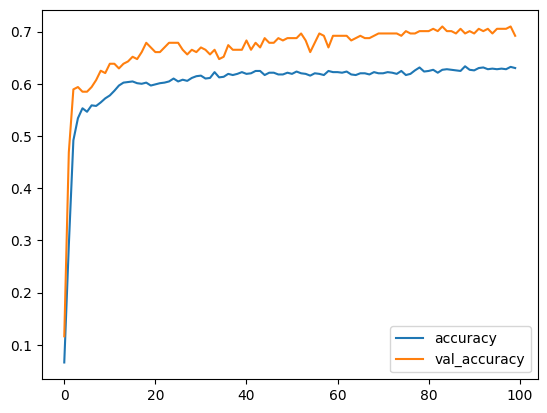

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.metrics import accuracy_score

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Épocas')
    plt.ylabel('Erro')
    plt.legend()
    plt.grid(True)

def plot_acc(history):
    plt.plot(history.history['accuracy'], label='acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.grid(True)

normalizer = preprocessing.Normalization()
normalizer.adapt(X_train.values)

X = dataset_pos_remocao_colunas.drop(['quality'], axis=1)
y = pd.get_dummies(dataset_pos_remocao_colunas['quality'], columns=['quality'])

display(X.head())
display(y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = keras.Sequential([
    normalizer,
    layers.Dense(8, activation='tanh'),
    layers.Dense(4, activation='tanh'),
    layers.Dense(6, activation='softmax')
])

model.summary()

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_split = 0.2,
    batch_size=10,
    verbose=0
)

plot_loss(history)

y_pred = model.predict(X_test).reshape(-1)

losses = pd.DataFrame(history.history)

losses[['loss','val_loss']].plot()
losses[['accuracy','val_accuracy']].plot()

print(model.metrics_names)
print(model.evaluate(X_test,y_test,verbose=0))

# Conclusões sobre os modelos

A preencher